# Load Dependencies

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Training/Training_python_7.git
%cd Training_python_7

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
random_seed=2022

# Load Data

In [2]:
df_data=pd.read_excel('./Data/Data.xlsx')
train_num=49
re_1=np.array(df_data)[:train_num,1]
ratio=np.array(df_data)[:train_num,8]
des_all=np.array(df_data)[:,9:]
ratio_log=np.array([np.log(i) for i in ratio])
des_max=des_all[:train_num,:].max(axis=0)
des_min=des_all[:train_num,:].min(axis=0)
des_all_std=(des_all-des_min)/(des_max-des_min)
smiles_set_map_df = pd.read_csv('./Data/re_1_smiles_set_dict.csv')
smiles_set_map={str(smi):[a,b,c,d] for smi,a,b,c,d in zip(smiles_set_map_df['SMILES'].to_list(),
                                              smiles_set_map_df['1'].to_list(),smiles_set_map_df['2'].to_list(),
                                              smiles_set_map_df['3'].to_list(),smiles_set_map_df['4'].to_list())} 

# External Prediction

In [3]:
sel_index = [9, 11, 5, 25, 26, 18, 17, 16, 21, 15, 13, 24, 8, 19, 2]
des_sel=des_all_std[:,sel_index]
train_y=ratio_log[0:train_num]
model = ExtraTreesRegressor(random_state=random_seed,n_jobs=60)
all_r2 = []
all_pearsr = []
all_mae = []
repeat_pred = []
for i in range(10):
    train_index_tep=list(range(train_num))
    test_index_tep=list(range(train_num,70))
    train_x,test_x = des_sel[train_index_tep],des_sel[test_index_tep]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    repeat_pred.append(test_pred)

e=2.718281828459
mean_pred = np.mean(repeat_pred,axis=0)
pred_value=np.round(e**mean_pred,2)

# External results

In [4]:
test_re1=np.array(df_data)[:,1].tolist()[train_num:70]

## Two Sites

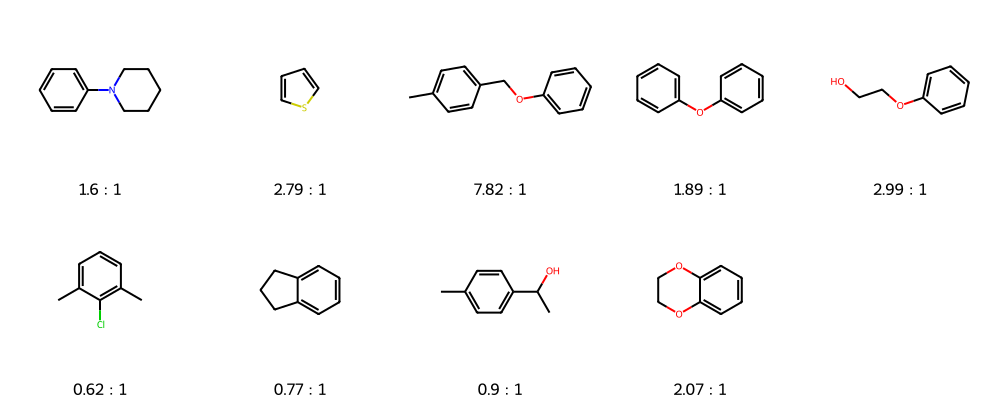

<Figure size 6000x5000 with 0 Axes>

In [5]:
mol2=[]
pred_value2=[]
for index,i in enumerate(test_re1):
    tem_site_num=test_re1.count(i)
    if tem_site_num==1:
        mol2.append(Chem.MolFromSmiles(i))
        pred_value2.append(pred_value[index])

fig = plt.figure(figsize=(60,50))
Chem.Draw.MolsToGridImage(mol2,molsPerRow=5,subImgSize=(200,200),
                          legends=[str(i)+str(' : ')+str(1) for index,i in enumerate(pred_value2)])

## Three Sites

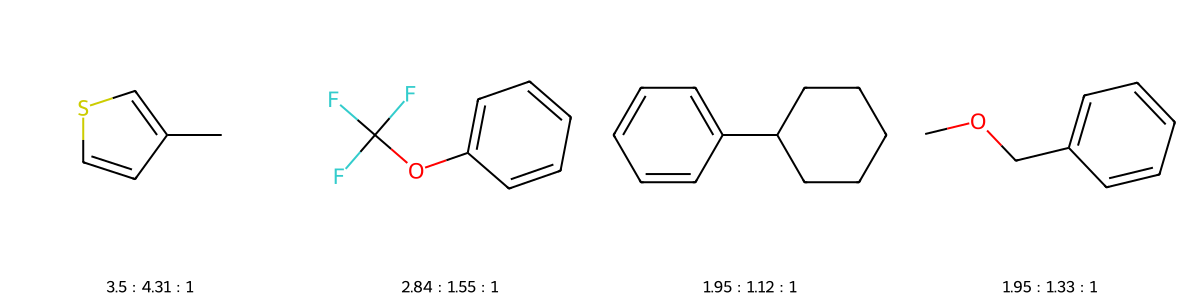

<Figure size 6000x5000 with 0 Axes>

In [6]:
mol3=[]
pred_value3=[]
for index,i in enumerate(set(test_re1)):
    tem_site_num=test_re1.count(i)
    if tem_site_num==3:
        mol3.append(Chem.MolFromSmiles(i))
        tem_index=[ind for ind,j in enumerate(test_re1) if j==i]
        pred_value3.append([pred_value[tem_index[0]],pred_value[tem_index[1]],pred_value[tem_index[2]]])

fig = plt.figure(figsize=(60,50))
img=Chem.Draw.MolsToGridImage(mol3,molsPerRow=4,subImgSize=(300,300),
                          legends=[str(i[1])+str(' : ')+str(i[2])+str(' : ')+str(1) for index,i in enumerate(pred_value3)])
img